In [31]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Reading csv file to datframe
 
df = pd.read_csv('/content/2.concerticcir1.csv',header=None)

In [33]:
# Starting 5 data points
df.head()

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0


In [34]:
# Shape of dataframe
df.shape

(100, 3)

In [35]:
df[[0,1]]

,0,1
0,-0.382891,-0.090840
1,-0.020962,-0.477874
2,-0.396116,-1.289427
3,-0.618130,-0.063837
4,0.703478,-0.187038
...,...,...
95,-0.474862,-0.224981
96,0.126272,0.869784
97,-0.647365,-0.363424
98,0.474405,1.011016


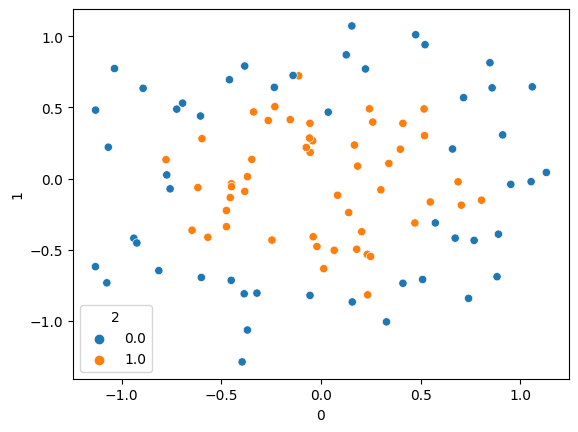

In [36]:
sns.scatterplot(x=df[0],y= df[1],hue=df[2]);

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[[0,1]],df[2],test_size=0.1)

In [38]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [39]:
x_test.shape

(10, 2)

In [40]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_trainf = std.fit_transform(x_train)
x_testf = std.transform(x_test)

In [41]:
model=Sequential()
model.add(Dense(6,activation="relu",input_dim=2))

model.add(Dense(4,activation="relu"))

model.add(Dense(2,activation="relu"))

model.add(Dense(1,activation="sigmoid"))

In [42]:
model.get_weights()

[array([[ 0.3194508 , -0.529482  ,  0.2664935 , -0.10624397,  0.6203906 ,
         -0.8450895 ],
        [-0.6268692 ,  0.28305763,  0.6869169 , -0.82487583, -0.23393935,
         -0.74790657]], dtype=float32),
 array([0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.569554  ,  0.28526676, -0.08781767,  0.39738882],
        [-0.6517925 , -0.13675922, -0.26564598, -0.17127597],
        [ 0.06604868, -0.44995156,  0.41047823, -0.53263867],
        [ 0.03530496,  0.0648219 ,  0.6831112 ,  0.34302676],
        [-0.59095854,  0.6981261 ,  0.383932  , -0.596703  ],
        [ 0.68595874,  0.00117123, -0.211384  ,  0.3353473 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.15045452,  0.4660356 ],
        [ 0.339324  , -0.40396357],
        [-0.08174157,  0.22049356],
        [-0.8202481 ,  0.41047502]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.95438504],
        [ 0.55415046]], dtype=float32),
 array([0.], dtype=float32)]

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 18        
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [51]:
history=model.fit(x_trainf,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
3/3 [==============================] - 0s 58ms/step - loss: 0.6444 - accuracy: 0.5833 - val_loss: 0.6555 - val_accuracy: 0.5556
Epoch 2/200
3/3 [==============================] - 0s 36ms/step - loss: 0.6442 - accuracy: 0.5833 - val_loss: 0.6551 - val_accuracy: 0.5556
Epoch 3/200
3/3 [==============================] - 0s 36ms/step - loss: 0.6439 - accuracy: 0.5833 - val_loss: 0.6547 - val_accuracy: 0.5556
Epoch 4/200
3/3 [==============================] - 0s 30ms/step - loss: 0.6436 - accuracy: 0.5833 - val_loss: 0.6542 - val_accuracy: 0.5556
Epoch 5/200
3/3 [==============================] - 0s 37ms/step - loss: 0.6433 - accuracy: 0.5833 - val_loss: 0.6538 - val_accuracy: 0.5556
Epoch 6/200
3/3 [==============================] - 0s 35ms/step - loss: 0.6431 - accuracy: 0.5833 - val_loss: 0.6535 - val_accuracy: 0.5556
Epoch 7/200
3/3 [==============================] - 0s 32ms/step - loss: 0.6428 - accuracy: 0.5833 - val_loss: 0.6535 - val_accuracy: 0.5556
Epoch 8/200
3/3 [===

In [52]:
y_cap=model.predict(x_testf)

1/1 [==============================] - 0s 25ms/step


In [53]:
y_capf=np.where(y_cap>0.5,1,0)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

1.0

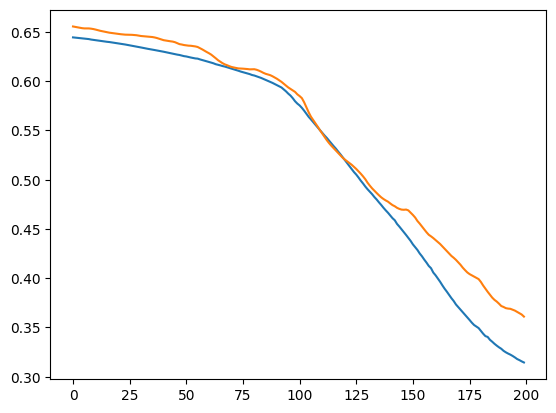

In [55]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [56]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 14s 1ms/step


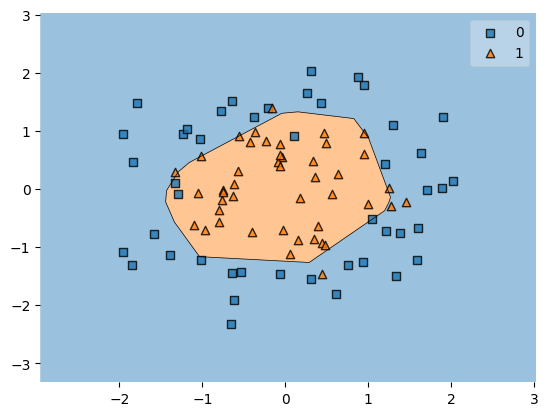

In [57]:
plot_decision_regions(x_trainf,y_train.values.astype(int),clf=model);

In [58]:
y_capf

array([[0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0]])

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

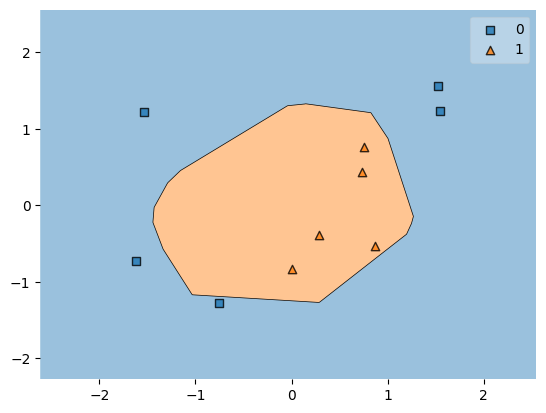

In [59]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)

In [60]:
x_testf[[0,1]]

array([[ 1.54530176,  1.22773848],
       [-1.5321291 ,  1.22168013]])

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

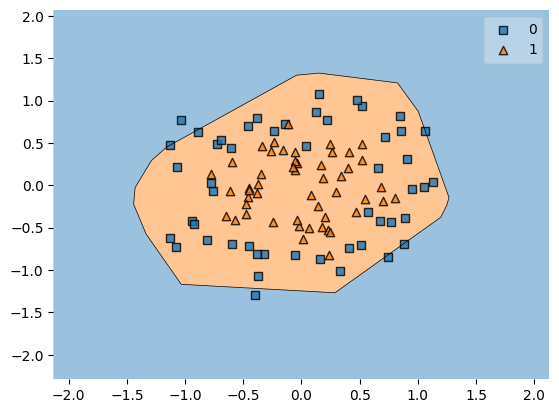

In [61]:
plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)